<h3>Polarity for Article Titles Within and Between News Outlets</h3>

In [9]:
from textblob import TextBlob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

In [5]:
def title_extract(file_name):
    """
    Extracts all article titles from txt files
    Input: a txt file (string)
    Output: article title names (list)
    """
    titles = []
    text_file = open(file_name,"r")
    for line in text_file:
        line = line.strip()
        titles.append(line)
    return titles

In [15]:
#Extract all article names from txt file
fox_titles = title_extract("fox.txt")
abc_titles = title_extract("abc.txt")
wsj_titles = title_extract("wsj.txt")
npr_titles = title_extract("npr.txt")
nyt_titles = title_extract("nytimes.txt")
washington_titles = title_extract("washington.txt")
huffpost_titles = title_extract("Huffpost.txt")
breit_titles = title_extract("breitbart.txt")
econ_titles = title_extract("economist.txt")

In [10]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [11]:
#see how pos/neg the titles are
def polar_subj(article_titles):
    """
    Takes each article title and determines the polarity & subjectivity 
    Input: list of article titles (list)
    Output: title_polarity (list), title_subj (list)
    """
    title_polarity = []
    title_subj = []
    for title in article_titles:
        blob = TextBlob(title)
        title_polarity.append(blob.sentiment.polarity)
        title_subj.append(blob.sentiment.subjectivity)
    return title_polarity, title_subj

In [16]:
# Obtain two lists (polarity and subjectivity) for each website
fox_polar, fox_subj = polar_subj(fox_titles)
abc_polar, abc_subj = polar_subj(abc_titles)
wsj_polar, wsj_subj = polar_subj(wsj_titles)
npr_polar, npr_subj = polar_subj(npr_titles)
nyt_polar, nyt_subj = polar_subj(nyt_titles)
wash_polar, wash_subj = polar_subj(washington_titles)
huff_polar, huff_subj = polar_subj(huffpost_titles)
breit_polar, breit_subj = polar_subj(breit_titles)
econ_polar, econ_subj = polar_subj(econ_titles)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

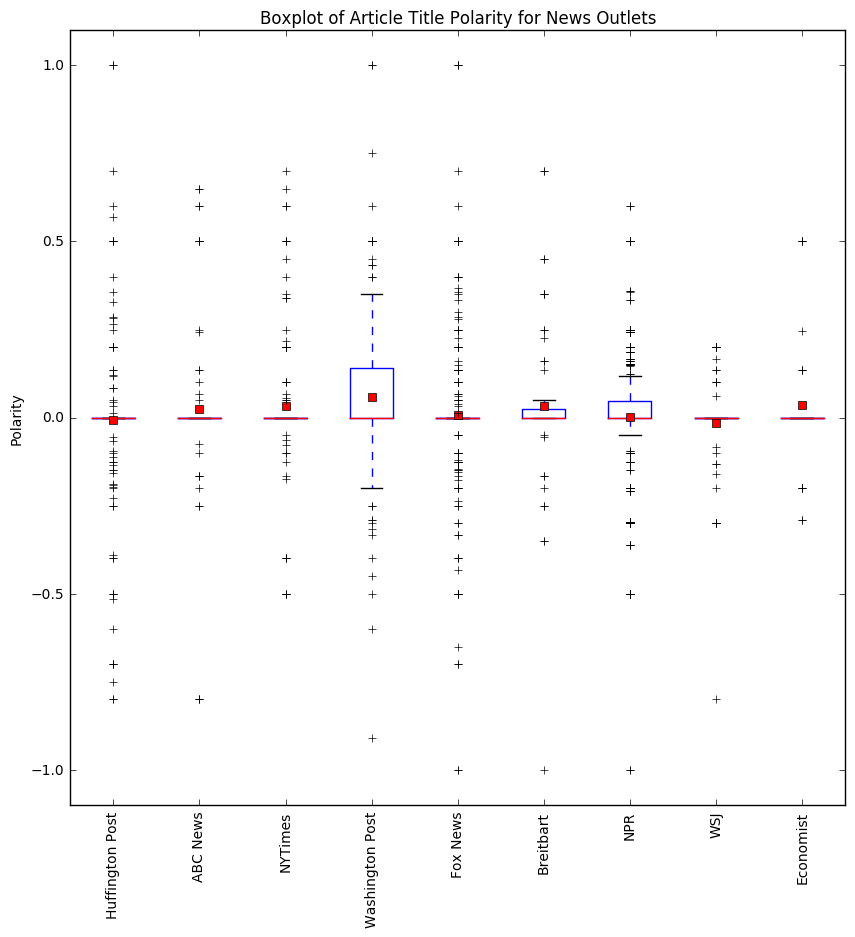

In [90]:
#Plot the article title polarity values for each news outlet 
polar_to_plot = [huff_polar, abc_polar, nyt_polar, wash_polar, fox_polar, breit_polar, npr_polar, wsj_polar, econ_polar]
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)

bp = ax.boxplot(polar_to_plot, showmeans=True)
pylab.ylim([-1.1,1.1])
ax.set_title("Boxplot of Article Title Polarity for News Outlets")
ax.set_ylabel('Polarity')
ax.set_xticklabels( ('Huffington Post', 'ABC News', 'NYTimes', 'Washington Post', 'Fox News', 'Breitbart', 'NPR', 'WSJ', 'Economist') )
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

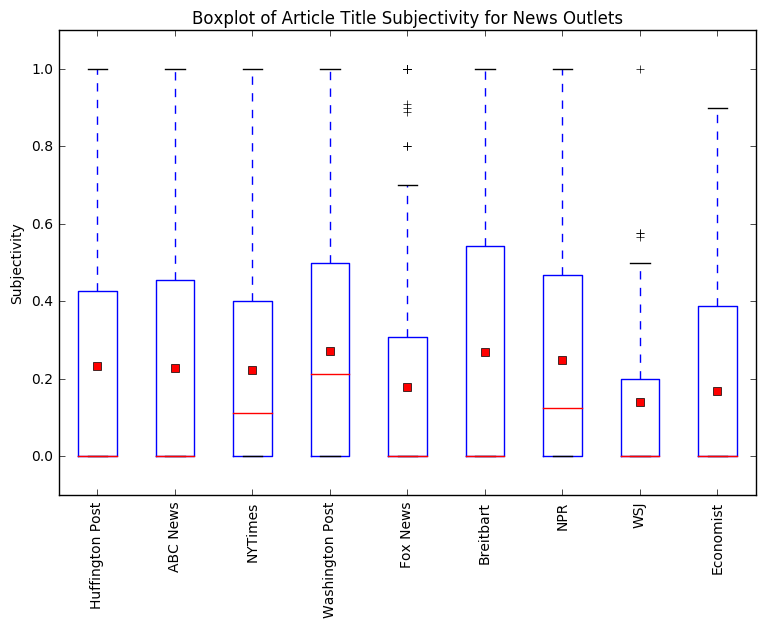

In [89]:
#Plot the article title subjectivity values for each news outlet 
subj_to_plot = [huff_subj, abc_subj, nyt_subj, wash_subj, fox_subj, breit_subj, npr_subj, wsj_subj, econ_subj]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

bp = ax.boxplot(subj_to_plot, showmeans=True)
pylab.ylim([-0.1,1.1])
ax.set_title("Boxplot of Article Title Subjectivity for News Outlets")
ax.set_ylabel('Subjectivity')
ax.set_xticklabels( ('Huffington Post', 'ABC News', 'NYTimes', 'Washington Post', 'Fox News', 'Breitbart', 'NPR', 'WSJ', 'Economist') )
plt.xticks(rotation=90)

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

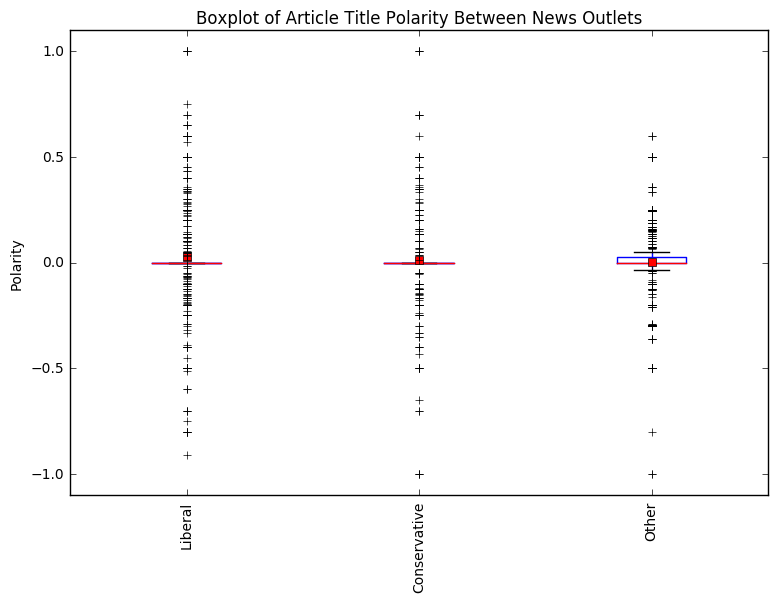

In [87]:
#Plot the Polarity of Conservative, Liberal, and Other News Outlets
grouped_polar = [huff_polar+abc_polar+nyt_polar+wash_polar, fox_polar+breit_polar, npr_polar+wsj_polar+econ_polar]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

bp = ax.boxplot(grouped_polar, showmeans=True)
pylab.ylim([-1.1,1.1])
ax.set_title("Boxplot of Article Title Polarity Between News Outlets")
ax.set_ylabel('Polarity')
ax.set_xticklabels( ('Liberal', 'Conservative', 'Other') )
plt.xticks(rotation=90)

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

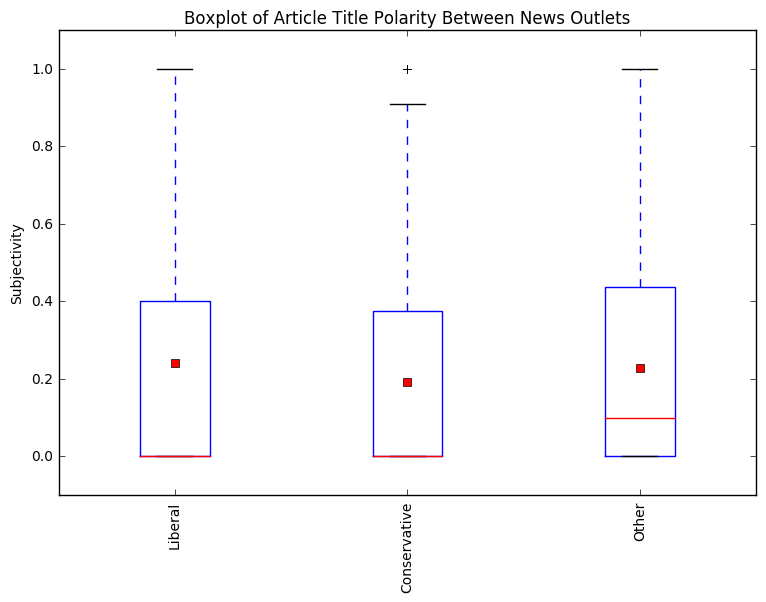

In [86]:
#Plot the Subjectivity of Conservative, Liberal, and Other News Outlets
grouped_subj = [huff_subj+abc_subj+nyt_subj+wash_subj, fox_subj+breit_subj, npr_subj+wsj_subj+econ_subj]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

bp = ax.boxplot(grouped_subj, showmeans=True)
pylab.ylim([-0.1,1.1])
ax.set_title("Boxplot of Article Title Polarity Between News Outlets")
ax.set_ylabel('Subjectivity')
ax.set_xticklabels( ('Liberal', 'Conservative', 'Other') )
plt.xticks(rotation=90)